# Introduction

Imagine in the real world, you would like to have a sketch-up of a beautiful scene near a river. To have the sketch-up, you need a canvas (and of course an easel to support the canvas) to draw on and pens. You hold the pens to draw on the canvas.   

Matplotlib virtualise this drawing concept. To draw any plot, you need a canvas, in what ways to draw (renderer), to draw a painting (figure). Details of the Canvas and Renderer have been hidden by Matplotlib and thus they are "Backend" you normally cannot see. Figure is something you can see and manipulate, from its size to color of the plotting objects on it and thus they are "Frontend" you can see. Our journey starts from Figure.

![canvas](canvas.jpeg)

*Image from [iStock](https://www.istockphoto.com/photo/canvas-on-a-wooden-easel-gm1066570840-285211717)*

Concepts of Canvas in Art
* [5 Things I Wish I Knew as a BEGINNER ARTIST](https://www.youtube.com/watch?v=pEq6BfEY0ak) - show you how to draw oil painting on a canvas
* [How do they do it? Claessens Artists' canvas](How do they do it? Claessens Artists' canvas) - show you how a canvas is made from raw materials

# Figure, Axes, Axis & Artists

Imagine `Figure` as the painting you wanna draw. Everything is a part of it.

`Axes` is a specific region of a plot while `Axis` is the axis in mathematical sense on `Axes.

In a much broader sense, `Artist` is a virtualised concept referring to any plotting object, from `Figure`, `Axes` to `Line2D` (line object), `Patch` (colored polygon object). However, I tend to think of it as plotting object on `Axes`, in a narrow sense. This won't affect our learning (especially in reading the documentation) for most of the time.

![anatomy](anatomy.png)

# APIs & Learning Resources

In general, Matplotlib has two API entries for most of its functionality, which are the `pyplot` convenience wrapper interface and the `object-oriented (OO) style` interface. 

Majority of the current matplotlib documentation would discourage the use of `pyplot` interface and encourage the use of the `object-oriented (OO) style` interface because you can only control the details in the OO style but not in `pyplot` style for most of the time. 

However, some niche corners of the documentation and also my opinion would say that `pyplot`, rather than a discouraged interface, is a convenience wrapper of matplotlib functionalities and something you can only do in `pyplot` but not in `OO` (well, I mean, not in the style of `ax.something`).

The follwings are official learning resources of matplotlib.

**Resources**

Note here I use `devdocs` version of the documentation rather than `stable` version because I think the style of `devdocs` version is more clear, and aligned with other numeric package documentation (e.g. `numpy`, `pandas`).  

* [Usage Guide](https://matplotlib.org/devdocs/tutorials/introductory/usage.html) - Overview
* [Tutorials](https://matplotlib.org/devdocs/tutorials/index.html) - General functionalities you'll encounter in every plot
* [Gallery](https://matplotlib.org/devdocs/gallery/index.html) - Types of plots (not only useful in showing you how that plot is drawn, but also visual explanations of the parameters lack in some API documentation)
* [Reference](https://matplotlib.org/devdocs/api/index.html) - APIs

# Layout

Well, finally we come to this file's focus point, the layout

Here is the structure of the layout

**subplots constructors**

* `subplots` <br/>
    create axes and place them at rectangular `gridspec`
    * `Figure.subplots` <br/>
        convenience wrapper of `GridSpec` & `GridSpecBase.subplots`, which delegates subplot creation to its parent figure `Figure.add_subplot` (*gridspec_kw* will be passed on to `Figure
    * `plt.subplots` <br/>
        convenience wrapper of `Figure` instance & `Figure.subplots` - I personally like this method

`gridspec` **module**

* `GridSpec(GridSpecBase)` <br/>
    Layout specification, controlling the relative scale of subplots. Parameters include 
    * number of rows, number of columns; <br/>
    * width relative ratios, height relative ratios; <br/>
    * Layout parameters <br/>
        These parameters are not compatible with *constrained_layout* or *tight_layout* (both adjust subplot sizes to fill the figure) <br/>
        These parameters can also be specified in `subplots_adjust`, but which only affects the subplots that are created from the given GridSpec
        * left, bottom, right, top position; 
        * width spacing, height spacing; 
    
* `SubplotSpec(object)` <br/>
    The location of a subplot in a GridSpec. It describes the properties of the subplot in a gridspec, often created by subset a `GridSpec`. Within the `SubplotSpec`, one can create a nested `GridSpec` by using `SubplotSpec.subgridspec` (*nrows, ncols, **kwargs*) -> `GridSpecFromSubplotSpec`. <br/>
    `SubplotSpec` can also have a gridspec `GridSpecFromSubplotSpec` by `SubplotSpec.subgridspec` method.

Note that: 
1. `Figure.add_gridspec` is a convenience wrapper method of gridspec constructor
2. `Figure.add_subplot` not only accepts single indexed `GridSpec` but also slicing `GridSpec`, e.g. gs[0, 0:] <br/>
    both returning a `SubplotSpec` instance after single indexing or slicing. Check it using `type(gs[0, 0])`

There are several ways of using the layout, but broadly speaking, manual or automatic

In [20]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [23]:
# automatic
fig, axs = plt.subplots(ncols = 2, nrows = 2, constrained_layout=True)
axs[0, 0] # axs[0][0] 
axs[0, 1] # axs[0][1]
axs[1, 0] # axs[1][0]
axs[1, 1] # axs[1][1]

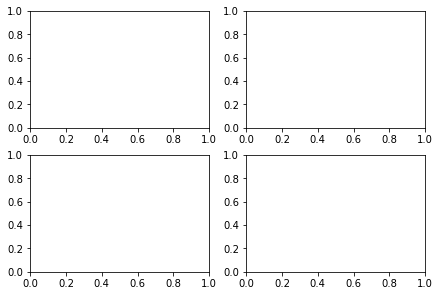

In [29]:
# manual
fig = plt.figure(constrained_layout=True)
gs = gridspec.GridSpec(ncols=2, nrows=2, figure = fig) 
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])

# Contrained & Tight Layout

`constrained_layout` automatically adjusts subplots and decorations like legends and colorbars so that they fit in the figure window while still preserving, as best they can, the logical layout requested by the user. constrained_layout is similar to tight_layout, but uses a constraint solver to determine the size of axes that allows them to fit. - Matplotlib Docs

`constrained_layout` has many applications in different artists.

## Colorbars

If you create a colorbar with Figure.colorbar, you need to make room for it. constrained_layout does this automatically. Note that if you specify use_gridspec=True it will be ignored because this option is made for improving the layout via tight_layout. - Matplotlib Docs

For a complete introduction to colorbars, please see `colors` module in this repo instead.

## Suptitle

## Legends

## Padding and Space

`Figure.set_constrained_layout` has extra padding arguments than `Figure.subplots_adjust`

Spacing between subplots is further set by wspace and hspace. These are specified as a fraction of the size of the subplot group as a whole. If these values are smaller than w_pad or h_pad, then the fixed pads are used instead. - [Constrained Layout Guide](https://matplotlib.org/devdocs/tutorials/intermediate/constrainedlayout_guide.html)

## Use with GridSpec

`GridSpec` has its own `GridSpec.tight_layout` method (the pyplot api `pyplot.tight_layout` also works). - Matplotlib Docs

## Manually setting axes positions

`Axes.set_position` can reset the created `Axes` position, so constrained_layout has no effect on it anymore. - Matplotlib Docs

## Manually turning on/off `constrained_layout` or `tight_layout`

`Figure.set_constrained_layout` (False)

`Figure.set_tight_layout` (False)

## Other Caveats

`constrained_layout` 

* `constrained_layout` only considers ticklabels, axis labels, titles, and legends. Thus, other artists may be clipped and also may overlap.
* It assumes that the extra space needed for ticklabels, axis labels, and titles is independent of original location of axes. This is often true, but there are rare cases where it is not.
* There are small differences in how the backends handle rendering fonts, so the results will not be pixel-identical.
* An artist using axes coordinates that extend beyond the axes boundary will result in unusual layouts when added to an axes. This can be avoided by adding the artist directly to the `Figure` using `add_artist`(). See `ConnectionPatch` for an example.

`tight_layout`
* `tight_layout` considers all artists on the axes by default. To remove an artist from the layout calculation you can call `Artist.set_in_layout`.
* It assumes that the extra space needed for artists is independent of the original location of axes. This is often true, but there are rare cases where it is not.
* *pad = 0* can clip some texts by a few pixels. This may be a bug or a limitation of the current algorithm and it is not clear why it happens. Meanwhile, use of pad larger than 0.3 is recommended.

\- Matplotlib Docs

# Autoscaling - View Limit

`Axes.set_xlim` or `Axes.set_ylim` $\ge$ `Axes.sticky_edges` $\approx$ `Axes.margins` (In normal data, even if `sticky_edges` is set to True, +/- margin will still affect the view limit. However, in images, if `sticky_edges` is set to True, + margin will not affect view limit but - margin will)

`Axes.set_xlim` or `Axes.set_ylim` will disable autoscale unless you toggle manually, which means once you add a new artist, the view limit will not be autoscaled, although the data limit and thus margin has been recalculated. 

`Axes.autoscale` is a higher-level API. It allows the Axes to adjust (i.e. autoscale) the view limit based on recalculated data limit and margins, which means once you add a new artist, the view limit will be autoscaled, based on the recalculated data limit and thus margins. The *tight* parameter sets the margin of the selected axis to zero. This is toggled on by default. Check its status by `Axes.get_autoscale_on()`.

`Axes.autoscale_view` is a lower-level API. The autoscale only expands the axis limits using the margins through the `tight` parameter, which means once you add a new artist, the view will be autoscaled only based on original data limit and thus margins. The data limits are not updated automatically when artist data are changed after the artist has been added to an Axes instance. In that case, use `matplotlib.axes.Axes.relim()` prior to calling autoscale_view. (thus, I think `Axes.autoscale == Axes.relim() + Axes.autoscale_view` under no tight situation)

## `Axes.margins`

Set or retrieve autoscaling margins

If a previously used Axes method such as `pcolor()` has set `use_sticky_edges` to `True`, only the limits not set by the "sticky artists" will be modified. To force all of the margins to be set, set `use_sticky_edges` to `False` before calling `margins()`.

## `Axes.use_sticky_edges` or `Artist.sticky_edges`

There are plot elements (Artists) that are usually used without margins. For example false-color images (e.g. created with Axes.imshow) are not considered in the margins calculation.

While sticky edges don't increase the axis limits through extra margins, negative margins are still taken into account. This can be seen in the reduced limits of the third image.

Note: `Artist.sticky_edges.x` & `Artist.sticky_edges.y` exists and values of them can be changed.

## `Axes.autoscale` or `Axes.autoscale_view`

`Axes.autoscale`
* Autoscale the axis view to the data (toggle).
* Convenience method for simple axis view autoscaling. It turns autoscaling on or off, and then, if autoscaling for either axis is on, it performs the autoscaling on the specified axis or axes. 
* To preserve settings of either `enable` or `tight` you can set the opposite one to *None*, that way it should not be modified. However, setting `enable` to *None* and tight to *True* affects both axes regardless of the `axis` argument.

`Axes.autoscale_view`
* Autoscale the view limits using the data limits. 
* The autoscaling preserves any preexisting axis direction reversal. The data limits are not updated automatically when artist data are changed after the artist has been added to an Axes instance. In that case, use `Axes.relim()` prior to calling `Axes.autoscale_view`. 
* If the views of the axes are fixed, e.g. via `set_xlim`, they will not be changed by autoscale_view(). See `Axes.autoscale()` for an alternative.
* Autoscale works out of the box for all lines, patches, and images added to the axes. One of the artists that it won't work with is a `Collection`. After adding a collection to the axes, one has to manually trigger the `autoscale_view()` to recalculate axes limits.

## `Axes.set_xlim` or `Axes.set_ylim` or `Axes.relim`

`Axes.set_xlim` or `Axes.set_ylim`
* Set the x-axis/y-axis view limits. Limits may be passed in reverse order to flip the direction of the x-axis.

`Axes.relim`
* Recompute the data limits based on current artists. At present, `Collection` instances are not supported.

# Resources

Guides

* [Customizing Figure Layouts Using GridSpec and Other Functions](https://matplotlib.org/devdocs/tutorials/intermediate/gridspec.html)
* [Constrained Layout Guide](https://matplotlib.org/devdocs/tutorials/intermediate/constrainedlayout_guide.html)
* [Tight Layout guide](https://matplotlib.org/devdocs/tutorials/intermediate/tight_layout_guide.html)
* [Autoscaling](https://matplotlib.org/devdocs/tutorials/intermediate/autoscale.html)